In [4]:
import pandas as pd
import numpy as np

In [5]:
open('CCD.csv','rb').readlines()[:10]

[b'Ticket ID,Ticket Created,Date of Issue,Time of Issue,Form,Method,Issue,Caller ID Number,Type of Call or Messge,Advertiser Business Number,City,State,Zip,Lat/Long\r\n',
 b'1000296,05/25/2016 11:15:29 AM +0000,5/1/2016,1:00 PM,Phone,Internet (VOIP),Robocalls,866-410-0458,Autodialed Live Voice Call,,Plantation,FL,33324,"FL 33324\n',
 b'(26.11294, -80.27429)"\r\n',
 b'1000319,05/25/2016 12:51:35 PM +0000,3/7/2016,12:00 PM,Phone,Wired,Telemarketing (including do not call and spoofing),619-840-7262,Live Voice,619-840-7262,San Marcos,CA,92078,"CA 92078\n',
 b'(33.122635, -117.190612)"\r\n',
 b'1000322,05/25/2016 12:56:54 PM +0000,5/24/2016,8:08 PM,Phone,Wireless (cell phone/other mobile device),Telemarketing (including do not call and spoofing),626-691-9090,Live Voice,626-691-9090,Wyckoff,NJ,7481,"NJ 07481\n',
 b'(40.998076, -74.167269)"\r\n',
 b'1000323,05/25/2016 01:00:22 PM +0000,3/7/2016,,Phone,Wired,Telemarketing (including do not call and spoofing),877-218-8361,Abandoned Calls,,Hopki

In [6]:
tips2 = pd.read_csv("CCD.csv", error_bad_lines=False)

In [7]:
tips2.head()

Ticket ID                Ticket Created Date of Issue Time of Issue   Form  \
0    1000296  05/25/2016 11:15:29 AM +0000      5/1/2016       1:00 PM  Phone   
1    1000319  05/25/2016 12:51:35 PM +0000      3/7/2016      12:00 PM  Phone   
2    1000322  05/25/2016 12:56:54 PM +0000     5/24/2016       8:08 PM  Phone   
3    1000323  05/25/2016 01:00:22 PM +0000      3/7/2016           NaN  Phone   
4    1000326  05/25/2016 01:02:31 PM +0000     5/25/2016       7:24 PM  Phone   

                                      Method  \
0                            Internet (VOIP)   
1                                      Wired   
2  Wireless (cell phone/other mobile device)   
3                                      Wired   
4                            Internet (VOIP)   

                                               Issue Caller ID Number  \
0                                          Robocalls     866-410-0458   
1  Telemarketing (including do not call and spoof...     619-840-7262   
2  Telemarketing (including do not call and spoof...     626-691-9090   
3  Telemarketing (including do not call and spoof...     877-218-8361   
4  Telemarketing (including do not call and spoof...     877-705-6767   

       Type of Call or Messge Advertiser Business Number        City State  \
0  Autodialed Live Voice Call                        NaN  Plantation    FL   
1                  Live Voice               619-840-7262  San Marcos    CA   
2                  Live Voice               626-691-9090     Wyckoff    NJ   
3             Abandoned Calls                        NaN  Hopkington    MA   
4             Abandoned Calls                        NaN      Aurora    IL   

     Zip                                Lat/Long  
0  33324         FL 33324\n(26.11294, -80.27429)  
1  92078      CA 92078\n(33.122635, -117.190612)  
2   7481       NJ 07481\n(40.998076, -74.167269)  
3   1748       MA 01748\n(42.224925, -71.537489)  
4  60504  IL 60504-8149\n(41.771365, -88.226673)

In [8]:
tips2["Lat/Long"].head(10)

0           FL 33324\n(26.11294, -80.27429)
1        CA 92078\n(33.122635, -117.190612)
2         NJ 07481\n(40.998076, -74.167269)
3         MA 01748\n(42.224925, -71.537489)
4    IL 60504-8149\n(41.771365, -88.226673)
5         NY 13601\n(43.977155, -75.916148)
6          PA 18104\n(40.60276, -75.537329)
7         MS 39301\n(32.313297, -88.624084)
8         AR 71909\n(34.652444, -92.980651)
9        CA 92620\n(33.708843, -117.758618)
Name: Lat/Long, dtype: object

In [9]:

tips3 = tips2.head(10000)

In [10]:
def fun1(row) :
    if row['Lat/Long'] and "(" in row['Lat/Long'] : 
        return str(row['Lat/Long']).split("(")[1].split(",")[0]
tips3 = tips3[tips3['Lat/Long'] != "NaN"]
tips3 = tips3[tips3['Lat/Long'].isnull() == False]
tips3["latitude"] = tips3.apply(lambda row: fun1(row), axis=1)
tips3["longitude"] = tips3.apply(lambda row: str(row['Lat/Long']).split("(")[1].split(",")[1].split(")")[0], axis=1)

In [11]:
tips3

Ticket ID                Ticket Created Date of Issue Time of Issue  \
0       1000296  05/25/2016 11:15:29 AM +0000      5/1/2016       1:00 PM   
1       1000319  05/25/2016 12:51:35 PM +0000      3/7/2016      12:00 PM   
2       1000322  05/25/2016 12:56:54 PM +0000     5/24/2016       8:08 PM   
3       1000323  05/25/2016 01:00:22 PM +0000      3/7/2016           NaN   
4       1000326  05/25/2016 01:02:31 PM +0000     5/25/2016       7:24 PM   
5       1000328  05/25/2016 01:03:17 PM +0000     5/25/2016       7:00 AM   
6       1000330  05/25/2016 01:10:06 PM +0000     3/14/2016      11:00 AM   
7       1000332  05/25/2016 01:16:14 PM +0000     3/14/2016      11:00 AM   
8       1000335  05/25/2016 01:25:05 PM +0000     5/24/2016     2:30 p.m.   
9       1000336  05/25/2016 01:30:02 PM +0000     3/14/2016       2:30 PM   
10      1000338  05/25/2016 01:30:34 PM +0000     5/24/2016     4:00 p.m.   
11      1000342  05/25/2016 01:32:27 PM +0000     5/24/2016     5:59 P.M.   
12      1000344  05/25/2016 01:34:19 PM +0000     5/25/2016       8:49 AM   
13      1000361  05/25/2016 01:49:10 PM +0000     5/25/2016     8:20 a.m.   
14      1000370  05/25/2016 01:55:37 PM +0000     5/24/2016       8:30 PM   
15      1000374  05/25/2016 02:04:17 PM +0000     5/23/2016       3:01 PM   
16      1000380  05/25/2016 02:09:16 PM +0000     3/15/2016      11:00 AM   
17      1000386  05/25/2016 02:12:14 PM +0000     5/13/2016       3:25 PM   
18      1000388  05/25/2016 02:17:46 PM +0000     5/20/2016       8:13 PM   
19      1000393  05/25/2016 02:20:37 PM +0000     5/25/2016       7:40 AM   
20      1000398  05/25/2016 02:21:55 PM +0000     5/23/2016       7:15 AM   
21      1000407  05/25/2016 02:26:28 PM +0000     5/23/2016      11:15 AM   
22      1000416  05/25/2016 02:29:15 PM +0000     5/24/2016       4:00 PM   
23      1000422  05/25/2016 02:31:50 PM +0000     5/25/2016       9:25 AM   
24      1000425  05/25/2016 02:32:40 PM +0000     5/25/2016       7:51 AM   
25      1000426  05/25/2016 02:34:58 PM +0000     5/25/2016       8:58 AM   
26      1000428  05/25/2016 02:37:12 PM +0000     5/24/2016       8:10 PM   
27      1000429  05/25/2016 02:37:23 PM +0000     5/25/2016    09:28 a.m.   
28      1000432  05/25/2016 02:42:37 PM +0000     3/15/2016           NaN   
29      1000433  05/25/2016 02:43:05 PM +0000     5/25/2016       9:30 AM   
...         ...                           ...           ...           ...   
9970    1166200  08/29/2016 08:44:30 PM +0000     8/29/2016      12:27 PM   
9971    1054242  06/24/2016 08:57:10 PM +0000     6/24/2016      12:49 PM   
9972    1166201  08/29/2016 08:44:31 PM +0000     8/16/2016       1:30 PM   
9973    1166202  08/29/2016 08:44:35 PM +0000     8/29/2016    12:11 p.m.   
9974    1054245  06/24/2016 08:58:03 PM +0000     6/24/2016      11:00 AM   
9975    1054246  06/24/2016 08:58:59 PM +0000     6/24/2016      12:51 PM   
9976    1054251  06/24/2016 09:00:53 PM +0000     6/24/2016      11:33 AM   
9977    1054252  06/24/2016 09:01:07 PM +0000     6/24/2016     1:44 P.M.   
9978    1054276  06/24/2016 09:08:19 PM +0000     6/24/2016      10:58 AM   
9979    1032943  06/13/2016 04:54:48 PM +0000           NaN           NaN   
9980    1032973  06/13/2016 05:04:27 PM +0000           NaN           NaN   
9981    1204608  09/19/2016 01:55:53 PM +0000           NaN           NaN   
9982    1054291  06/24/2016 09:13:02 PM +0000           NaN           NaN   
9983    1166218  08/29/2016 08:48:18 PM +0000     8/14/2016       2:35 PM   
9984    1032944  06/13/2016 04:55:06 PM +0000           NaN           NaN   
9985    1032960  06/13/2016 04:58:29 PM +0000           NaN           NaN   
9986    1239504  10/07/2016 04:11:07 AM +0000     9/29/2016       5:06 PM   
9987    1054283  06/24/2016 09:11:29 PM +0000           NaN           NaN   
9988    1105412  07/27/2016 12:09:28 AM +0000     7/26/2016       1:00 PM   
9989    1166220  08/29/2016 08:48:43 PM +0000     8/29/2016       3:40 PM   
99

In [12]:
!pip install mplleaflet
import matplotlib.pyplot as pp
% %matplotlib inline
import mplleaflet
pp.figure(figsize=(10,10))
pp.hold(True)
pp.plot(tips3['longitude'], tips3['latitude'], 'rs') # Draw red squares
mplleaflet.display()

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [13]:
df = pd.DataFrame(tips3["Time of Issue"])


In [14]:
df = df.dropna()
df.head()

Time of Issue
0       1:00 PM
1      12:00 PM
2       8:08 PM
4       7:24 PM
5       7:00 AM

In [15]:
hours = tips3.groupby('Time of Issue')
hours.head()

Ticket ID                Ticket Created Date of Issue Time of Issue  \
0       1000296  05/25/2016 11:15:29 AM +0000      5/1/2016       1:00 PM   
1       1000319  05/25/2016 12:51:35 PM +0000      3/7/2016      12:00 PM   
2       1000322  05/25/2016 12:56:54 PM +0000     5/24/2016       8:08 PM   
3       1000323  05/25/2016 01:00:22 PM +0000      3/7/2016           NaN   
4       1000326  05/25/2016 01:02:31 PM +0000     5/25/2016       7:24 PM   
5       1000328  05/25/2016 01:03:17 PM +0000     5/25/2016       7:00 AM   
6       1000330  05/25/2016 01:10:06 PM +0000     3/14/2016      11:00 AM   
7       1000332  05/25/2016 01:16:14 PM +0000     3/14/2016      11:00 AM   
8       1000335  05/25/2016 01:25:05 PM +0000     5/24/2016     2:30 p.m.   
9       1000336  05/25/2016 01:30:02 PM +0000     3/14/2016       2:30 PM   
10      1000338  05/25/2016 01:30:34 PM +0000     5/24/2016     4:00 p.m.   
11      1000342  05/25/2016 01:32:27 PM +0000     5/24/2016     5:59 P.M.   
12      1000344  05/25/2016 01:34:19 PM +0000     5/25/2016       8:49 AM   
13      1000361  05/25/2016 01:49:10 PM +0000     5/25/2016     8:20 a.m.   
14      1000370  05/25/2016 01:55:37 PM +0000     5/24/2016       8:30 PM   
15      1000374  05/25/2016 02:04:17 PM +0000     5/23/2016       3:01 PM   
16      1000380  05/25/2016 02:09:16 PM +0000     3/15/2016      11:00 AM   
17      1000386  05/25/2016 02:12:14 PM +0000     5/13/2016       3:25 PM   
18      1000388  05/25/2016 02:17:46 PM +0000     5/20/2016       8:13 PM   
19      1000393  05/25/2016 02:20:37 PM +0000     5/25/2016       7:40 AM   
20      1000398  05/25/2016 02:21:55 PM +0000     5/23/2016       7:15 AM   
21      1000407  05/25/2016 02:26:28 PM +0000     5/23/2016      11:15 AM   
22      1000416  05/25/2016 02:29:15 PM +0000     5/24/2016       4:00 PM   
23      1000422  05/25/2016 02:31:50 PM +0000     5/25/2016       9:25 AM   
24      1000425  05/25/2016 02:32:40 PM +0000     5/25/2016       7:51 AM   
25      1000426  05/25/2016 02:34:58 PM +0000     5/25/2016       8:58 AM   
26      1000428  05/25/2016 02:37:12 PM +0000     5/24/2016       8:10 PM   
27      1000429  05/25/2016 02:37:23 PM +0000     5/25/2016    09:28 a.m.   
28      1000432  05/25/2016 02:42:37 PM +0000     3/15/2016           NaN   
29      1000433  05/25/2016 02:43:05 PM +0000     5/25/2016       9:30 AM   
...         ...                           ...           ...           ...   
9931    1054169  06/24/2016 08:33:07 PM +0000     6/24/2016       3:12 PM   
9934    1054209  06/24/2016 08:51:18 PM +0000     6/23/2016     4:43 P.M.   
9935    1054211  06/24/2016 08:51:36 PM +0000     6/23/2016     4:43 P.M.   
9936    1054214  06/24/2016 08:51:55 PM +0000     6/24/2016       3:18 PM   
9951    1105353  07/26/2016 11:36:27 PM +0000     7/26/2016     8:15 A.M.   
9955    1204579  09/19/2016 01:32:01 PM +0000     9/19/2016     8:22 a.m.   
9956    1054221  06/24/2016 08:52:41 PM +0000     6/24/2016     9:58 a.m.   
9957    1054228  06/24/2016 08:54:08 PM +0000     6/24/2016       3:50 PM   
9959    1054234  06/24/2016 08:55:33 PM +0000     6/24/2016       3:22 PM   
9961    1204596  09/19/2016 01:44:17 PM +0000     9/19/2016       7:05 AM   
9962    1204600  09/19/2016 01:46:39 PM +0000     9/19/2016     8:30 A.M.   
9963    1204601  09/19/2016 01:49:37 PM +0000     9/19/2016       5:34 AM   
9964    1105367  07/26/2016 11:44:44 PM +0000     7/26/2016       3:34 PM   
9965    1204604  09/19/2016 01:55:08 PM +0000     9/19/2016    05:48 a.m.   
9966    1032895  06/13/2016 04:40:43 PM +0000     6/13/2016       8:24 AM   
9967    1032902  06/13/2016 04:42:19 PM +0000     6/13/2016      11:07 AM   
9970    1166200  08/29/2016 08:44:30 PM +0000     8/29/2016      12:27 PM   
9971    1054242  06/24/2016 08:57:10 PM +0000     6/24/2016      12:49 PM   
9973    1166202  08/29/2016 08:44:35 PM +0000     8/29/2016    12:11 p.m.   
9976    1054251  06/24/2016 09:00:53 PM +0000     6/24/2016      11:33 AM   
99

In [16]:
import matplotlib.pyplot as mp
%matplotlib inline

fcc4 = tips3['Time of Issue'].value_counts()

In [17]:
fcc4 = fcc4.to_frame()

In [18]:
fcc4 = fcc4.reset_index()

In [19]:
fcc4.head()

index  Time of Issue
0   1:00 PM             89
1  11:00 AM             58
2   9:00 AM             56
3  10:00 AM             56
4   3:00 PM             48

In [20]:
fcc4.columns = ['Time','count']

In [21]:
fcc4.head(25)

Time  count
0    1:00 PM     89
1   11:00 AM     58
2    9:00 AM     56
3   10:00 AM     56
4    3:00 PM     48
5    4:00 PM     43
6   12:00 PM     36
7    2:00 PM     35
8   10:30 AM     34
9    8:00 AM     32
10  11:30 AM     29
11   9:30 AM     27
12   5:00 PM     23
13   4:30 PM     21
14   1:30 PM     21
15   6:00 PM     19
16  12:30 PM     19
17   2:30 PM     19
18   3:30 PM     18
19   8:00 PM     18
20   7:00 PM     18
21  10:45 AM     18
22  11:45 AM     18
23   9:45 AM     17
24  10:00 PM     16

In [22]:
fcc5 = tips3['State'].value_counts()

In [23]:
fcc5 = fcc5.to_frame()

In [24]:
fcc5 = fcc5.reset_index()

In [25]:
fcc5.columns = ['State','count']

In [26]:
fcc5.head()

State  count
0    CA   1290
1    TX    779
2    FL    726
3    NY    534
4    PA    459

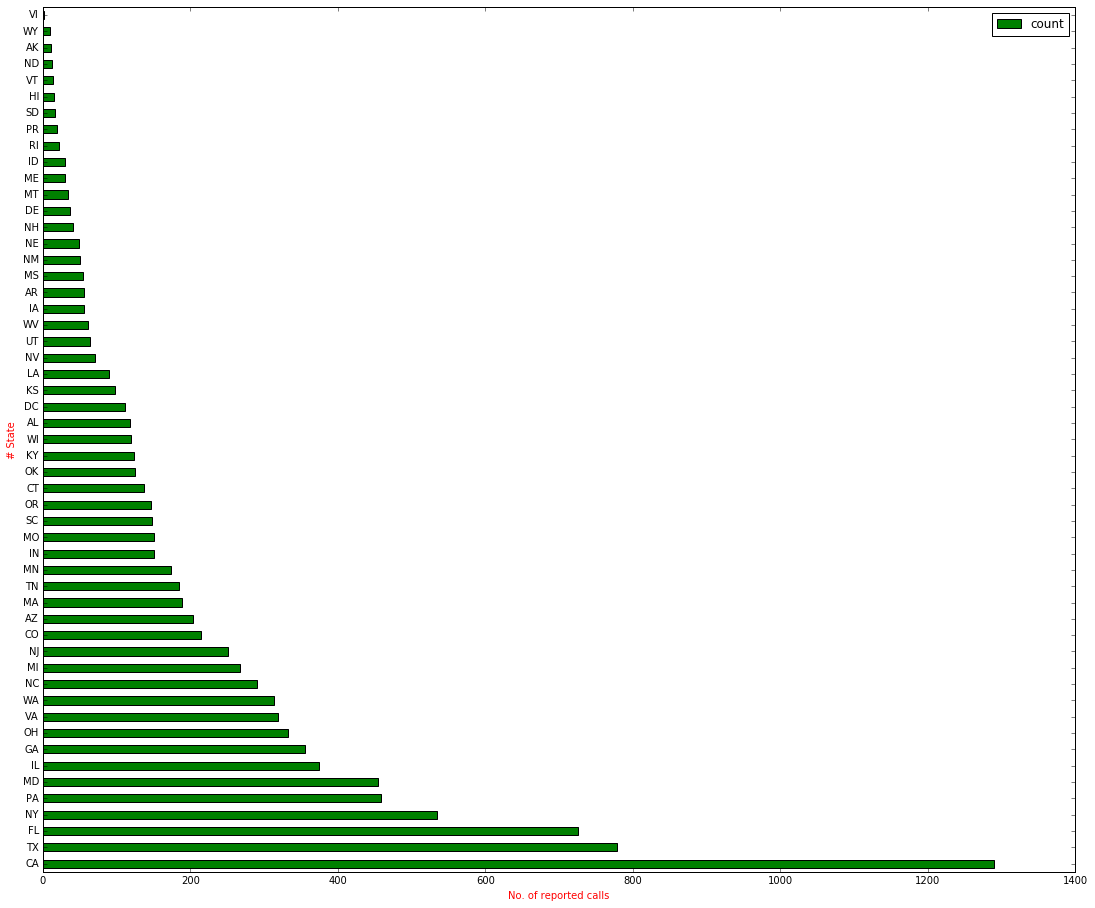

In [27]:
pp.figure(figsize=(5,5))
plot = fcc5.plot.barh('State',color='g')
fig = plot.get_figure()
fig.set_size_inches(18.5, 15.5)
plot.set_xlabel('No. of reported calls',color='R')
plot.set_ylabel('# State', color='R')
fig.savefig('figure6.pdf',bbox_inches='tight')

In [28]:
fcc6 = tips3['Issue'].value_counts()
fcc6 = fcc6.to_frame()
fcc6 = fcc6.reset_index()
fcc6.columns = ['Issue','count']

In [42]:
fcc6

Issue  count
0   Telemarketing (including do not call and spoof...   2841
1                                             Billing   1550
2                                           Robocalls   1549
3                        Open Internet/Net Neutrality   1177
4                                        Availability    463
5                                           Equipment    427
6                                        Interference    371
7                                             Privacy    360
8      Availability (including rural call completion)    307
9                                               Speed    210
10  Number Portability (keeping your number if you...    143
11                                         Junk Faxes    129
12                                          Indecency     95
13  Cramming (unauthorized charges on your phone b...     94
14                                     Unwanted Calls     82
15                                   Loud Commercials     61
16            Interference (including signal jammers)     60
17  Slamming (change of your carrier without permi...     11
18                                       Pirate Radio     10
19                                              Other      9
20                                              Phone      7
21                             Commercials/Promotions      5
22                Closed Captioning over the Internet      4
23                            Closed Captioning on TV      4
24             Telecommunications Relay Service (TRS)      3
25       Hearing Aid Compatibility of Wireless Phones      3
26       Hearing Aid Compatibility of Wireline Phones      1

In [61]:
fcc6 = fcc6.drop(6)

In [62]:
fcc6

Issue  count
0   Telemarketing (including do not call and spoof...   2841
1                                             Billing   1550
2                                           Robocalls   1549
7                                             Privacy    360
10  Number Portability (keeping your number if you...    143
12                                          Indecency     95
14                                     Unwanted Calls     82
18                                       Pirate Radio     10
19                                              Other      9
20                                              Phone      7
21                             Commercials/Promotions      5

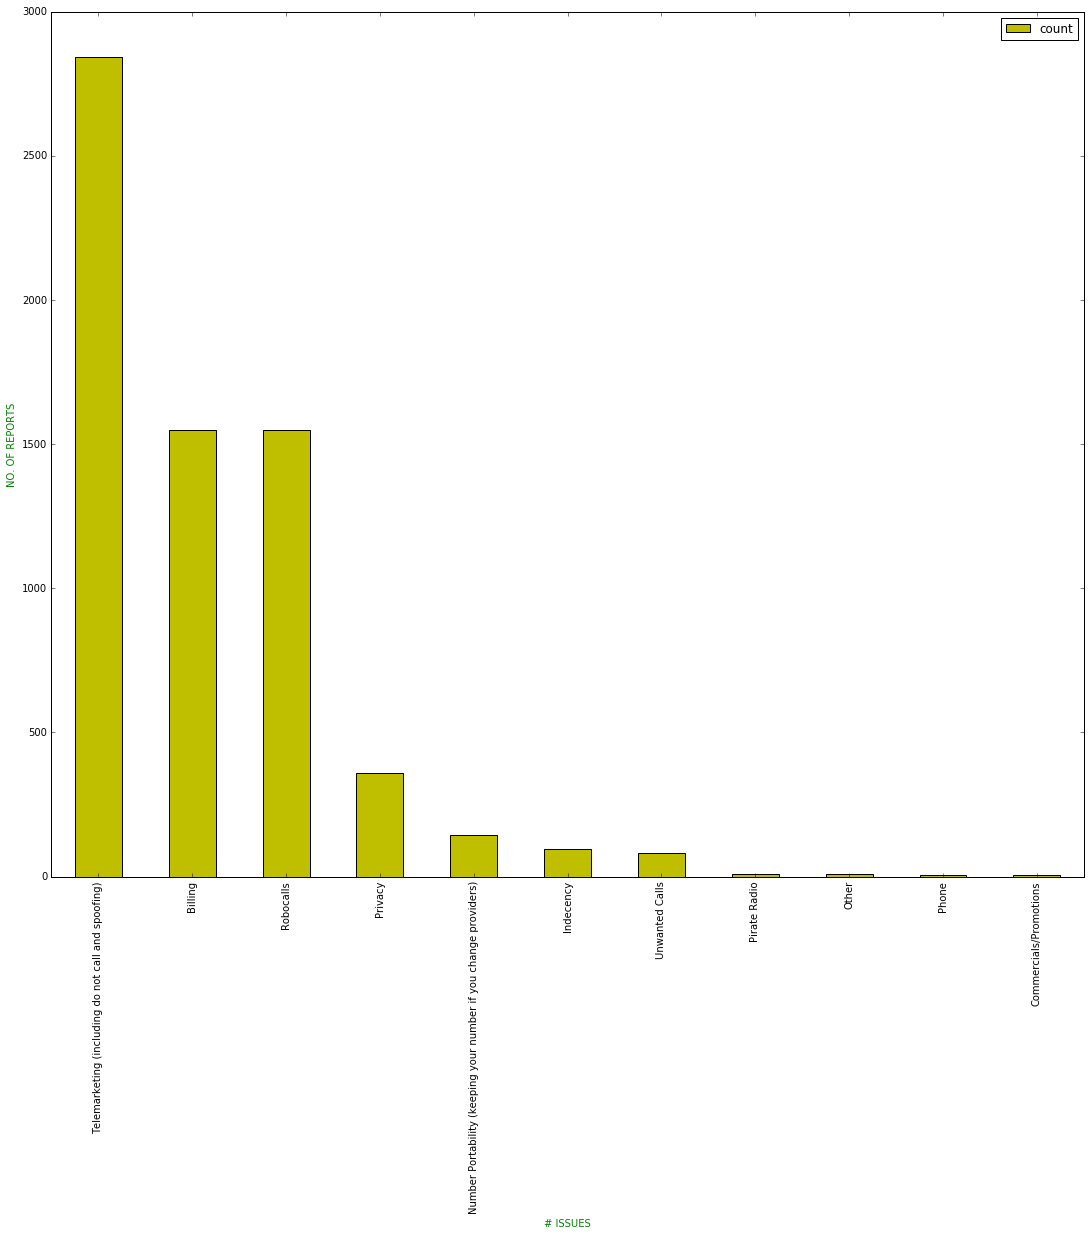

In [64]:

plot = fcc6.plot.bar('Issue',color='y')
fig = plot.get_figure()
fig.set_size_inches(18.5, 15.5)
plot.set_xlabel('# ISSUES',color='g')
plot.set_ylabel('NO. OF REPORTS', color='g')
fig.savefig('figure7.pdf',bbox_inches='tight')

In [30]:
hours = tips2['Time of Issue']
hours = hours.dropna()

In [31]:
type(hours)


pandas.core.series.Series

In [32]:
hours = hours.tolist()

In [33]:
amlist = []
pmlist = []

In [34]:
for line in hours:
    if ('P' or 'p') in line:
        pmlist.append(line)

In [35]:
for line in hours:
    if ('A' or 'a') in line:
        amlist.append(line)

In [36]:
amlist.sort()

In [37]:
pmlist.sort()

In [38]:
tentotwelve = []
twelvetotwo = []
twotofour = []
fourtosix = []
sixtoeight = []
eighttoten = []
tenamtotwelvepm = []

for line in pmlist:
    t = line.split(':')[0]
    if (t == '12' or t== '01' ):
        twelvetotwo.append(line)   
    if (t == '02' or t== '03' ):
        twotofour.append(line)
    if (t == '04' or t== '05' ):
        fourtosix.append(line)
    if (t == '06' or t== '07' ):
        sixtoeight.append(line)
    if (t == '08' or t== '09' ):
        eighttoten.append(line) 
        
        
for lines in amlist:
    t = lines.split(':')[0]
    if (t == '10' or t== '11' ):
        tenamtotwelvepm.append(line)

In [39]:
print(len(tenamtotwelvepm))
print(len(twelvetotwo))
print(len(twotofour))
print(len(fourtosix))
print(len(sixtoeight))
print(len(eighttoten))


57767
24742
184
129
60
38


In [40]:
u = {'tenamtotwelve': 57757,
           'twelvetotwo': 24742,
               'twotofour': 184,
               'fourtosix': 129,
               'sixtoeight': 60,
               'eighttoten': 38 }
                       


SyntaxError: invalid character in identifier (<ipython-input-40-8fa47f0eeebf>, line 2)

In [ ]:
u = pd.DataFrame( { "Time Range": ['10 am to 12 pm', '12 pm to 2 pm', '2 pm to 4 pm','4 pm to 6 pm','6 pm to 8 pm','8 pm to 10 pm'],
        "Number of calls": [57757, 24742, 184,129,60,38] 
} )

In [ ]:
u

In [ ]:
 
plot = u.plot.bar('Time Range',color='m')
fig = plot.get_figure()
fig.set_size_inches(10.5, 7.5)
plot.set_xlabel('TIME RANGE',color='g')
plot.set_ylabel(' NO. OF CALLS', color='g')

rects = ax.patches

# Now make some labels
labels = [57757,24742,184,129,60,38]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

fig.savefig('figure8.pdf',bbox_inches='tight')


In [ ]:
fcc7 = tips2['State'].value_counts()

In [ ]:
fcc7 = fcc7.to_frame()
fcc7 = fcc7.reset_index()
fcc7.columns = ['State','count']

In [ ]:
fcc7

In [ ]:
fcc7.drop(fcc7.index[[55]])

In [ ]:
fcc7.to_csv('empty.csv',header=True, index=True)